In [2]:
import pandas as pd
from hnmchallenge.data_reader import DataReader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from hnmchallenge.models.top_pop import TopPop
from hnmchallenge.evaluation.python_evaluation import map_at_k
from hnmchallenge.constant import *
from hnmchallenge.models.sgmc.sgmc import SGMC
from hnmchallenge.models.ease.ease import EASE
from hnmchallenge.models.itemknn.itemknn import ItemKNN 

In [3]:
import logging
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [4]:
dataset = FilterdDataset()
dr = DataReader()

In [184]:
fd = dr.get_filtered_full_data()

In [185]:
fd.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,0,0,0.008458,2
1,2018-09-20,0,0,0.008458,2
2,2018-09-20,1,1,0.033881,1
3,2018-09-20,2,2,0.021593,1
4,2018-09-20,3,3,0.022017,2


In [186]:
item_per_user = fd.groupby("customer_id")["article_id"].apply(list)

In [187]:
unique_item_per_user = item_per_user.apply(np.unique)

In [188]:
df_multiple = item_per_user.to_frame()
df_unique = unique_item_per_user.to_frame()

In [193]:
df_multiple["article_id"].isnull().values.any()

False

In [195]:
m_count = list(map(lambda x: len(np.array(x)), df_multiple["article_id"].values))

In [178]:
len(df_multiple["article_id"].values[0])

14

In [197]:
df_multiple["count"] = df_multiple.apply(lambda row: len(row["article_id"]), axis=1)

In [198]:
df_unique["count"] = df_unique.apply(lambda row: len(row["article_id"]), axis=1)

In [199]:
df_unique

,article_id,count
customer_id,,
0,"[0, 644, 1482, 1638, 1652, 1797, 1952, 4861, 7...",11
1,"[1, 339, 482, 759, 981, 1482, 2006, 2427, 2997...",21
2,"[2, 9, 196, 248, 249, 309, 326, 2055, 2238, 30...",26
3,"[3, 632, 2596, 3936]",4
4,[4],1
...,...,...
1136201,[17418],1
1136202,[20154],1
1136203,"[4770, 19923, 20246]",3


In [203]:
merge_df = pd.merge(df_multiple, df_unique, on="customer_id")

In [206]:
merge_df["diff"] = 1 - (merge_df["count_y"]/merge_df["count_x"])

array([[<AxesSubplot:title={'center':'diff'}>]], dtype=object)

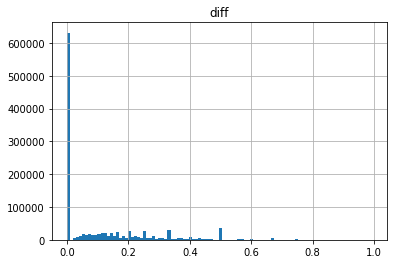

In [209]:
merge_df.hist("diff", bins=100)

In [160]:
list(map(len, item_per_user.values))

TypeError: object of type 'int' has no len()

In [157]:
item_per_user

customer_id
0          [0, 0, 0, 644, 1952, 1952, 1482, 1638, 1797, 4...
1          [1, 482, 759, 2006, 339, 339, 6018, 7534, 7534...
2          [2, 326, 2055, 2238, 4151, 309, 5786, 5174, 54...
3                              [3, 3, 3, 2596, 3936, 632, 3]
4                                                        [4]
                                 ...                        
1136202                                              [20154]
1136203                                 [19923, 20246, 4770]
1136204                                       [17478, 17478]
1136205               [10033, 7580, 1765, 838, 12955, 15003]
a                                                          1
Name: article_id, Length: 1136207, dtype: object

In [145]:
nn = fd.groupby(["article_id", "customer_id", "t_dat"]).count()

In [146]:
ll = nn[nn["price"]>1]
ll

price  sales_channel_id
article_id customer_id t_dat                              
0          0           2018-09-20      2                 2
           1220        2019-06-15      2                 2
           1226        2019-08-18      2                 2
           4118        2018-12-19      2                 2
           5351        2019-12-17      2                 2
...                                  ...               ...
22051      442400      2020-09-22      2                 2
22057      27310       2020-09-22      2                 2
22060      280338      2020-09-22      2                 2
22062      749097      2020-09-22      2                 2
22066      1136114     2020-09-22      2                 2

[1320507 rows x 2 columns]

In [147]:
nn = fd.groupby(["article_id", "customer_id"]).count()

In [148]:
ll = nn[nn["price"]>1]
ll

t_dat  price  sales_channel_id
article_id customer_id                                
0          0                3      3                 3
           135              2      2                 2
           1220             3      3                 3
           1226             3      3                 3
           1503             2      2                 2
...                       ...    ...               ...
22051      442400           2      2                 2
22057      27310            2      2                 2
22060      280338           2      2                 2
22062      749097           2      2                 2
22066      1136114          2      2                 2

[1722031 rows x 3 columns]

In [149]:
1320507/1722031

0.7668311429933607

In [134]:
nn = fd.groupby(["article_id", "customer_id", "sales_channel_id"]).count()

In [143]:
ll = nn[nn["price"]>1]
ll

t_dat  price
article_id customer_id sales_channel_id              
0          0           2                     3      3
           135         2                     2      2
           1220        2                     3      3
           1226        1                     3      3
           1503        2                     2      2
...                                        ...    ...
22051      442400      2                     2      2
22057      27310       2                     2      2
22060      280338      2                     2      2
22062      749097      2                     2      2
22066      1136114     1                     2      2

[1686817 rows x 2 columns]

In [142]:
sc = ll.index.get_level_values("sales_channel_id").values
len(sc[sc==2])

1441983

In [144]:
1441983/1686817

0.8548544388632555

In [99]:
c1 = fd.groupby(["article_id", "customer_id"]).count()

In [125]:
len(set(c1.index.get_level_values("article_id").values))

22069

In [122]:
len(set(c1[c1["price"]>1].index.get_level_values("article_id").values))

19776

In [123]:
len(set(c1[c1["price"]==2].index.get_level_values("article_id").values))

19615

In [127]:
c1

t_dat  price  sales_channel_id
article_id customer_id                                
0          0                3      3                 3
           135              2      2                 2
           207              1      1                 1
           315              1      1                 1
           551              1      1                 1
...                       ...    ...               ...
22064      650435           1      1                 1
22065      1136114          1      1                 1
22066      1136114          2      2                 2
22067      973998           1      1                 1
22068      62419            1      1                 1

[12106980 rows x 3 columns]

In [126]:
19615/22069

0.8888032987448458

In [120]:
multiple = c1[c1["price"]>1]

In [121]:
c1[c1["price"]==2]

t_dat  price  sales_channel_id
article_id customer_id                                
0          135              2      2                 2
           1503             2      2                 2
           2898             2      2                 2
           5351             2      2                 2
           7194             2      2                 2
...                       ...    ...               ...
22051      442400           2      2                 2
22057      27310            2      2                 2
22060      280338           2      2                 2
22062      749097           2      2                 2
22066      1136114          2      2                 2

[1412075 rows x 3 columns]

In [104]:
c2 = multiple.groupby("article_id").count().sort_values("price")

In [119]:
c2.head()

,t_dat,price,sales_channel_id
article_id,,,
22066,1,1,1
17988,1,1,1
7202,1,1,1
20646,1,1,1
7205,1,1,1


In [118]:
c2[c2["price"]>500]

,t_dat,price,sales_channel_id
article_id,,,
1775,501,501,501
9836,502,502,502
17465,502,502,502
2404,503,503,503
714,503,503,503
...,...,...,...
41,4176,4176,4176
130,4438,4438,4438
11,4596,4596,4596


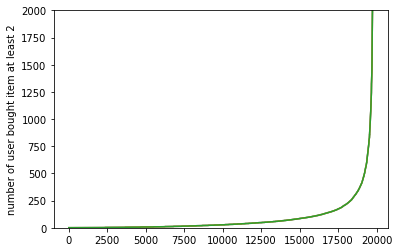

In [132]:
logging.basicConfig(level=logging.INFO)
y = c2.sort_values("price").values
x = np.arange(len(y))
plt.ylabel("number of user bought item at least 2")
plt.ylim(0,2000)
plt.plot(x,y)



In [97]:
multiple.groupby("article_id").mean()

t_dat               2.0
price               2.0
sales_channel_id    2.0
dtype: float64

In [64]:
len(fd["article_id"].unique())

22069

In [41]:
raw = dr.get_transactions().sort_values(["customer_id", "t_dat"])

In [78]:
raw[raw["customer_id"] == "000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8"]

,t_dat,customer_id,article_id,price,sales_channel_id
14,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0501820043,0.016932,2
15,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0501820043,0.016932,2
16,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0674681001,0.008458,2
17,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0671505001,0.033881,2
18,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0671505001,0.033881,2
19,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0631848002,0.033881,2
20,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0631848002,0.033881,2
21,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0631848002,0.033881,2
22,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0631848002,0.033881,2
23,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0680187001,0.016932,2


In [39]:
fd.loc[0:1]

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,0,0,0.008458,2
1,2018-09-20,0,0,0.008458,2


In [57]:
nr_m, _ = dr.get_filtered_new_raw_mapping_dict()

In [77]:
nr_m[0]

'000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8'

In [16]:
len(fd["article_id"].unique())

22069

In [66]:
count = fd.groupby([DEFAULT_USER_COL, DEFAULT_ITEM_COL]).count()

In [65]:
count.head()

,t_dat,price,sales_channel_id
article_id,,,
0,2.364224,2.364224,2.364224
1,2.303502,2.303502,2.303502
2,2.263158,2.263158,2.263158
3,2.543919,2.543919,2.543919
4,2.895122,2.895122,2.895122


In [7]:
# check which items have been bought multiple times
mb = count[count["price"]>1]

In [8]:
mb.head()

t_dat  price  sales_channel_id
customer_id article_id                                
0           0               3      3                 3
            1952            2      2                 2
1           339             2      2                 2
            3161            2      2                 2
            7534            2      2                 2

In [9]:
count = mb.groupby("article_id").mean()

In [61]:
count.head()

,t_dat,price,sales_channel_id
article_id,,,
0,2.364224,2.364224,2.364224
1,2.303502,2.303502,2.303502
2,2.263158,2.263158,2.263158
3,2.543919,2.543919,2.543919
4,2.895122,2.895122,2.895122


In [33]:
count[count["price"]>3]

,t_dat,price,sales_channel_id
article_id,,,
45,3.772739,3.772739,3.772739
123,3.371173,3.371173,3.371173
135,3.059521,3.059521,3.059521
179,3.364015,3.364015,3.364015
195,3.071069,3.071069,3.071069
...,...,...,...
20958,3.181818,3.181818,3.181818
21002,4.000000,4.000000,4.000000
21072,4.000000,4.000000,4.000000


In [21]:
len(count.index)

19776

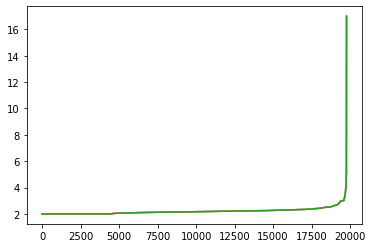

In [10]:
logging.basicConfig(level=logging.INFO)
y = count.sort_values("price").values
x = np.arange(len(y))
plt.plot(x,y)

In [12]:
y[:-20]

array([[2.        , 2.        , 2.        ],
       [2.        , 2.        , 2.        ],
       [2.        , 2.        , 2.        ],
       ...,
       [4.33333333, 4.33333333, 4.33333333],
       [4.33333333, 4.33333333, 4.33333333],
       [4.5       , 4.5       , 4.5       ]])

In [ ]:
item_id = count.index
count_buy = count["price"]

In [ ]:
mb.reset_index()

In [ ]:
final_count = mb.reset_index().groupby(DEFAULT_ITEM_COL).sum()[["price"]].reset_index().rename(columns = {"price":"count"})

In [ ]:
final_count = final_count.sort_values("count")

In [ ]:
final_count.head()

In [ ]:
logging.basicConfig(level=logging.INFO)
y = final_count["count"].values
x = np.arange(len(y))
plt.plot(x,y)

In [ ]:
final_count["count_cumsum"] = final_count["count"].cumsum(axis=0)
final_count["count_cumsum_norm"] = final_count["count_cumsum"]/final_count["count_cumsum"].max()

In [ ]:
final_count.head()

In [ ]:
logging.basicConfig(level=logging.INFO)
y = final_count["count_cumsum_norm"].values
x = np.arange(len(y))
plt.plot(x,y)

In [ ]:
len(final_count[final_count["count_cumsum_norm"]>0.05]["article_id"].unique())

In [ ]:
ccc.reset_index().rename(columns = {"price":"count"})

In [ ]:
len(ccc)

In [ ]:
ccc[ccc["price"]>1000]

In [ ]:
len(mb.reset_index()[DEFAULT_ITEM_COL].unique())

In [ ]:
mb.head()